**Задание 1. Загрузите файл HR.csv в pandas dataframe.**

In [1]:
import pandas as pd

In [2]:
hr_data = pd.read_csv('HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Обработаем данные и проверим тип в каждой из колонок
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Переведем столюцы с типом данных object в string
hr_data = hr_data.astype({'department': 'string', 'salary': 'string'})

In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  string 
 9   salary                 14999 non-null  string 
dtypes: float64(2), int64(6), string(2)
memory usage: 1.1 MB


**Задание 2. Рассчитайте основные статистики для переменных.**

In [6]:
# Высчитаем основные статистики количественных показателей
hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [8]:
hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
         'time_spend_company']].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [7]:
hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
         'time_spend_company']].mode().iloc[0]

satisfaction_level        0.10
last_evaluation           0.55
number_project            4.00
average_montly_hours    135.00
time_spend_company        3.00
Name: 0, dtype: float64

Уровень удовлетворенности работой в компании невысок - только 50% сотрудников имеют показатель больше 0.64.

В компании часто проводятся оценки - максимальное значение равно 1, то есть всего лишь полный год. В среднем оценка проводится каждые три квартала.

Каждый из сотрудников выполнил минимально 2 проекта. 50% сотрудников выполнили 4 и больше (до 7) проектов.

Минимальные значения среднего количества рабочих часов в месяц говорят нам о том, что часть сотрудников работает неполный день. При этом другая часть - перерабатывает, так как при пятидневной рабочей неделе в месяц около 22*8 = 176 рабочих часов.

Более 50% сотрудников работают дольше 3 лет, максимальное значение - 10 лет.

In [9]:
# Высчитаем основные статистики категориальных переменных
hr_data[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


array([[<Axes: title={'center': 'promotion_last_5years'}>]], dtype=object)

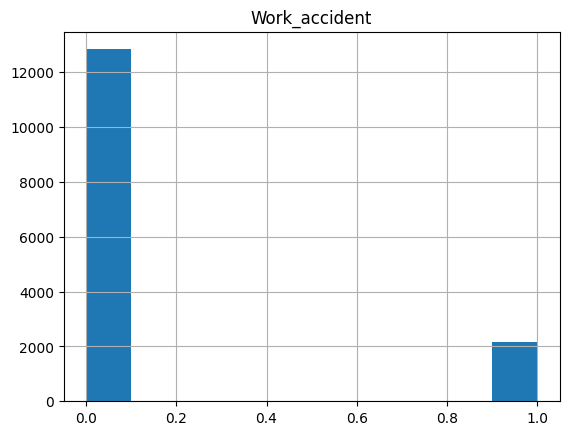

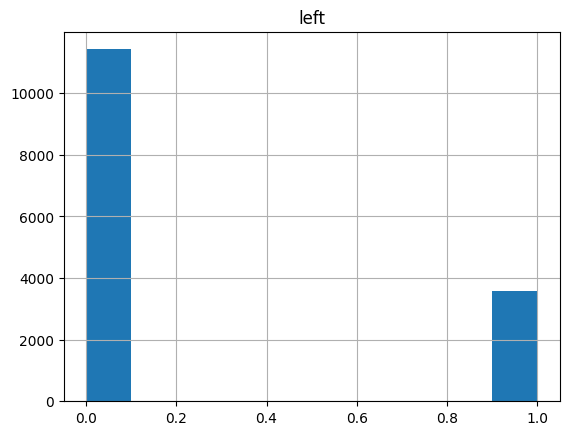

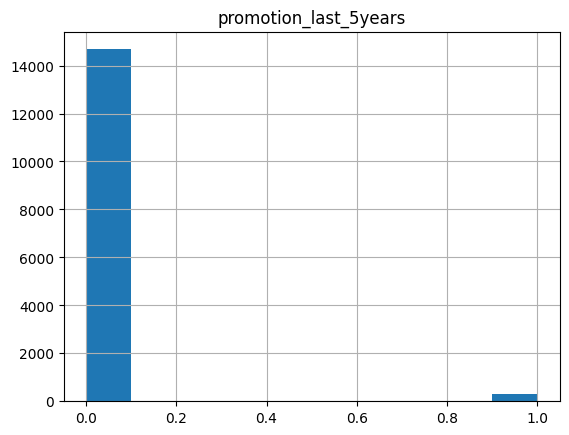

In [10]:
hr_data.hist('Work_accident')
hr_data.hist('left')
hr_data.hist('promotion_last_5years')

In [11]:
hr_data.groupby(['department'])['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

In [12]:
hr_data.groupby(['salary'])['salary'].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

Кажется, что компания не слишком заботится о безопасности своих сотрудников - более чем с 10% из них происходили несчастные случаи на рабочем месте.

Оценить количество увольнений сложно: с одной стороны, около 25% сотрудников покинули компанию; с другой стороны, нам не до конца ясен период, за который собраны данные. Если отталкиваться от того, что это 10 лет (максимальная продолжительность стажа в компании), то текучка не кажется большой.

Компания очень редко и точечно повышает сотрудников. За последние 5 лет мизерное число людей получили продвижение по службе.

Самый крупный отдел - продажи, за ним техническое обслуживание и поддержка. Меньше всего в компании менеджеров.

Почти 50% сотрудников имеют низкую зарплату. Меньше 10% - высокую.

**Задание 3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.**

In [13]:
corr_matrix = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
         'time_spend_company']].corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


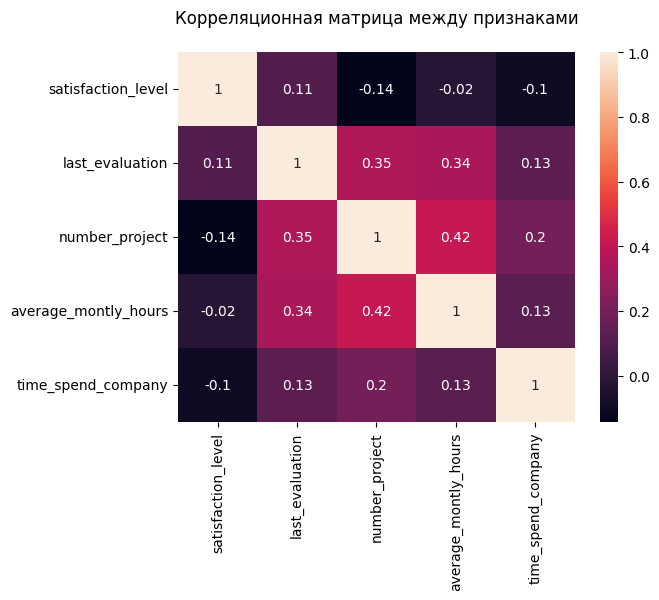

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица между признаками\n')
plt.show()

Два наиболее скоррелированных признака: количество выполненных проектов и среднее количество рабочих часов в месяц.

Наименее скореллированные признаки: количество выполненных проектов и уровень удовлетворенности работой.

**Задание 4. Рассчитайте сколько сотрудников работает в каждом
департаменте.**

In [15]:
real_workers = hr_data[hr_data['left'] == 0]
real_workers.groupby('department')['department'].count()

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: department, dtype: int64

Даже убрав из выгрузки людей, покинувших компанию, получаем, что самым крупным отделом являются продажи, за ним - техническое обслуживание и поддержка. При этом меньше всего в компании сотрудников hr-отдела и менеджеров.

**Задание 5. Покажите распределение сотрудников по зарплатам.**

In [16]:
sal_distr = real_workers.groupby('salary')['salary'].count()
sal_distr

salary
high      1155
low       5144
medium    5129
Name: salary, dtype: int64

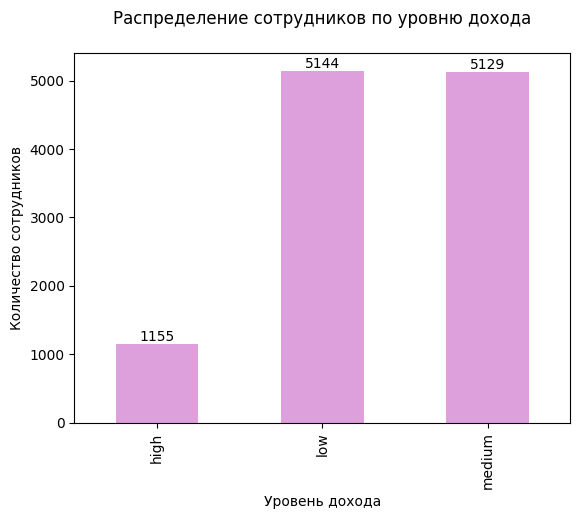

In [17]:
sal_distr.loc[['high', 'low', 'medium']].plot(kind='bar', title='Распределение сотрудников по уровню дохода\n',
                                              xlabel='Уровень дохода', ylabel='Количество сотрудников', color='plum')

for i, val in enumerate(sal_distr.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

plt.show()

Количество сотрудников с низким и средним доходами примерно одинаково. В 4 раза с лишним меньше сотрудников с высоким доходом.

**Задание 6. Покажите распределение сотрудников по зарплатам в каждом
департаменте по отдельности.**

In [18]:
sal_dep_distr = pd.DataFrame(real_workers.groupby(['department', 'salary'])['last_evaluation'].count())
sal_dep_distr_p = sal_dep_distr.pivot_table(index='department', columns='salary', values='last_evaluation')
sal_dep_distr_p

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


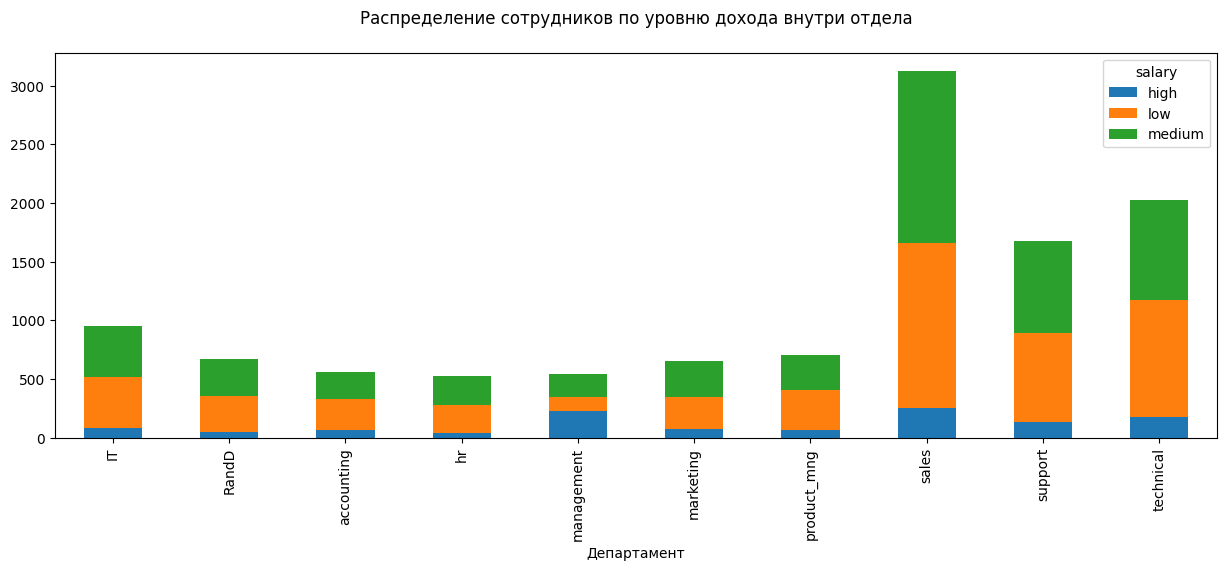

In [20]:
sal_dep_distr_p.plot(kind='bar', stacked=True, figsize=(15, 5), title='Распределение сотрудников по уровню дохода внутри отдела\n', xlabel='Департамент')

Среди департаментов выделяются менеджмент и продажи как отделы с наибольшим количеством сотрудников с высокой зарплатой. Однако в относительных цифрах эта цифра намного выше внутри менеджмента, у них же минимальное число людей с низкой зарплатой.

В относительных цифрах наибольшее число сотрудников с низкими доходами работает в техническом обслуживании, продуктовом менеджменте.

**Задание 7. Проверьте гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.**

H0: среднее количество рабочих часов у сотрудников с высоким окладом не отличается от среднего количества рабочих часов у сотрудников с низким окладом.

H1: среднее количество рабочих часов у сотрудников с высоким окладом отличается от среднего количества рабочих часов у сотрудников с низким окладом.

In [21]:
low_income = real_workers[real_workers['salary'] == 'low']['average_montly_hours']
high_income = real_workers[real_workers['salary'] == 'high']['average_montly_hours']
print(len(low_income))
print(len(high_income))

5144
1155


In [27]:
# Сначала проверим равенство дисперсий в выборках
import scipy.stats as st

def check_variance(group1, group2):
    stat, p = st.levene(low_income, high_income)
    print(f'p = {p:.5f}')

    if p > 0.05:
        print('На уровне доверия 95% не отклоняем нулевую гипотезу: вариация в группах одинаковая.')
    else:
        print('На уровне доверия 95% отклоняем нулевую гипотезу: вариация в группах различается.')

check_variance(low_income, high_income)

p = 0.17851
На уровне доверия 95% не отклоняем нулевую гипотезу: вариация в группах одинаковая.


In [28]:
# Так как обе выборки имеют достаточно большое количество наблюдений, воспользуемся критерием Стьюдента для проверки равенства средних
stat, p = st.ttest_ind(low_income, high_income)

print(f'Статистика = {stat:.3f}, p = {p:.5f}')

if p > 0.05:
    print('На уровне доверия 95% не отклоняем нулевую гипотезу. Среднее количество рабочих часов у сотрудников с высоким окладом не отличается от среднего количества рабочих часов у сотрудников с низким окладом.')
else:
    print('На уровне доверия 95% отклоняем нулевую гипотезу. Среднее количество рабочих часов у сотрудников с высоким окладом отличается от среднего количества рабочих часов у сотрудников с низким окладом.')

Статистика = -1.163, p = 0.24473
На уровне доверия 95% не отклоняем нулевую гипотезу. Среднее количество рабочих часов у сотрудников с высоким окладом не отличается от среднего количества рабочих часов у сотрудников с низким окладом.


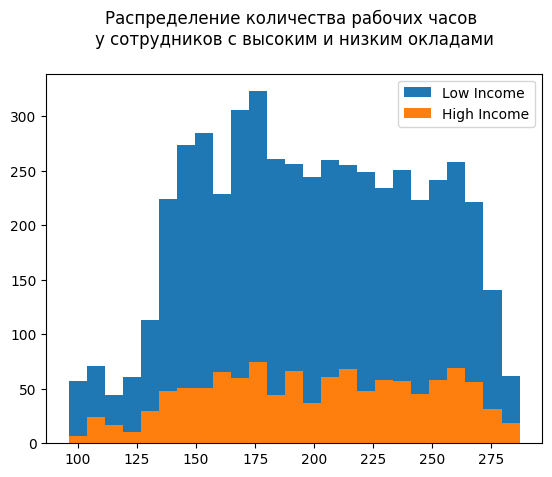

In [29]:
plt.hist(low_income, bins=25)
plt.hist(high_income, bins=25)
plt.legend(['Low Income', 'High Income'])
plt.title('Распределение количества рабочих часов \nу сотрудников с высоким и низким окладами\n')
plt.show()

**Задание 8. Рассчитайте показатели среди уволившихся и не
уволившихся сотрудников (по отдельности).**

In [30]:
# Доля сотрудников с повышением за последние 5 лет
hr_data.groupby('left')['promotion_last_5years'].agg(['mean'])*100

,mean
left,
0,2.625131
1,0.532064


2.6% - доля сотрудников с повышением среди тех, кто еще работает. Среди уволившихся таких только 0.5%, что логично - компания очень редко повышает работников.

In [31]:
# Средняя степень удовлетворенности
hr_data.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.666810,0.69
1,0.440098,0.41


Логично предположить, что удовлетворенность работой у тех, кто покинул компанию будет ниже, что и подтверждается статистикой.

In [32]:
# Среднее количество проектов
hr_data.groupby('left')['number_project'].agg(['mean'])

,mean
left,
0,3.786664
1,3.855503


Среднее количество выполненных проектов между двумя группами различается незначительно. Видимо, дело в удовлетворенности этими проектами (см. предыдущий расчет).

**Задание 9. Постройте модель LDA, предсказывающую, уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).**

In [33]:
from sklearn.model_selection import train_test_split
X = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
             'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = hr_data[['left']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [36]:
lda.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Наша модель с 75% точностью предсказала результат - будет увольнение или нет - на тестовой выборке. Есть предположение, что в случае кодирования значений в столбцах отдел и зарплата и добавления их в LDA эта модель могла бы быть точнее.